In [ ]:
# готовим функцию для красивой отрисовки градиента
import numpy as np
import matplotlib.pyplot as plt

def show_contours(objective,
                  x_lims=[-200.0, 202.0],
                  y_lims=[-200.0, 202.0],
                  x_ticks=100,
                  y_ticks=100):
    x_step = (x_lims[1] - x_lims[0]) / x_ticks
    y_step = (y_lims[1] - y_lims[0]) / y_ticks
    X, Y = np.mgrid[x_lims[0]:x_lims[1]:x_step, y_lims[0]:y_lims[1]:y_step]
    res = []
    for x_index in range(X.shape[0]):
        res.append([])
        for y_index in range(X.shape[1]):
            x_val = X[x_index, y_index]
            y_val = Y[x_index, y_index]
            res[-1].append(objective(np.array([[x_val, y_val]]).T))
    res = np.array(res)
    plt.figure(figsize=(7,7))
    plt.contour(X, Y, res, 100)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')

In [ ]:
# расcчитаем градиентный спуск для фунции для 10 cумма(x^2), x = тензор 1 на 2. Инициализирован значением 8
import torch

# тензор
x = torch.tensor(
    [200.,200.], requires_grad=True)

# сюда будем складывать значения тензора x при каждом шаге градиентного спуска
var_history = []

# сюда будем складывать значения функции при каждом шаге градиентного спуска
fn_history = []

# определяем функцию.
def function_parabola(variable):
    return 10 * (variable ** 2).sum()

# считаем шаг градиентного спуска
lr = 0.01
def make_gradient_step(function, variable):
    function_result = function(variable)
    function_result.backward()
    variable.data -= lr * variable.grad
    variable.grad.zero_()

# реализуем градиентный спуск, думаем, что за 500 шагов справимся, и найдем минимум функции.
for i in range(500):
    var_history.append(x.data.cpu().numpy().copy())
    fn_history.append(function_parabola(x).data.cpu().numpy().copy())
    make_gradient_step(function_parabola, x)

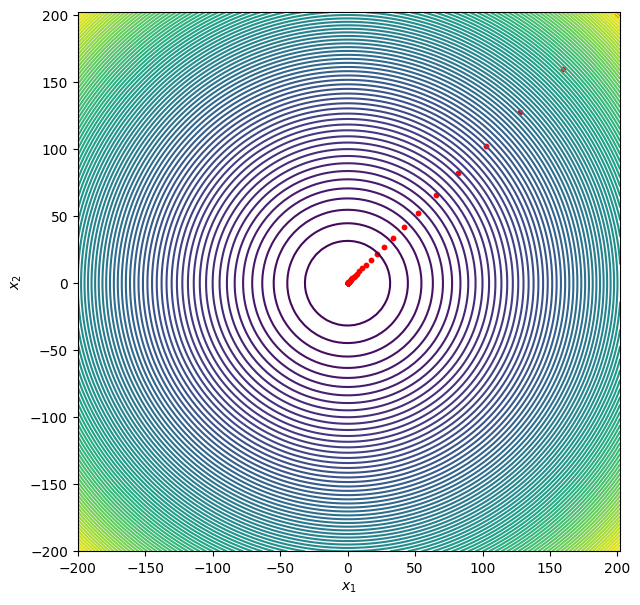

In [ ]:
show_contours(function_parabola)
plt.scatter(np.array(var_history)[:,0], np.array(var_history)[:,1], s=10, c='r')

## Задание 1. Сделайте трехмерную визуализацию сходимости градиентного спуска. Нарисуйте поверхность функции двух переменных для которой осуществлялся поиск минимума методом градиентного спуска. Отдельными точками другого цвета изобразите позиции которые рассматривались на каждом шаге градиентного спуска.

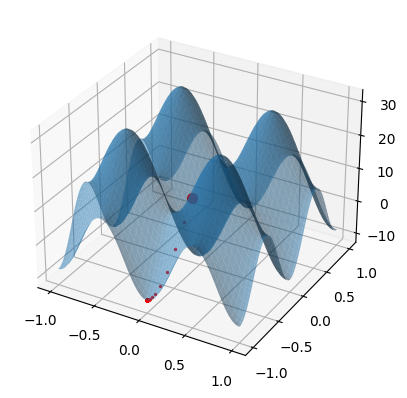

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def grad(x, y):
    dx = 2 * x + 20 * np.pi * np.sin(2 * np.pi * x)
    dy = 2 * y + 20 * np.pi * np.sin(2 * np.pi * y)
    return np.array([dx, dy])

#функция Растригина
x, y = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
z = 10 + x**2 - 10 * np.cos(2 * np.pi * x) + y**2 - 10 * np.cos(2 * np.pi * y)
#начальная точка
xp, yp = np.random.uniform(-1, 1), np.random.uniform(-1, 1)
zp = 10 + xp**2 - 10 * np.cos(2 * np.pi * xp) + yp**2 - 10 * np.cos(2 * np.pi * yp)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x, y, z, alpha=0.5)
ax.scatter(xp, yp, zp, color='red', s=50)

learning_rate = 0.001
i = 0
points = [(xp, yp, zp)]

while True:
    g = grad(xp, yp)
    xp -= learning_rate * g[0]
    yp -= learning_rate * g[1]
    zp = 10 + xp**2 - 10 * np.cos(2 * np.pi * xp) + yp**2 - 10 * np.cos(2 * np.pi * yp)
    points.append((xp, yp, zp))

    i += 1
    if i > 1000:
        break

colors = plt.cm.viridis(np.linspace(0, 1, len(points)))
for point, color in zip(points, colors):
    ax.scatter(*point, color='r', s=2)

plt.show()

## Задание 2. Для своего кода лабораторной работы №1 примените три разных оптимайзера. Постройте графики зависимости величины функции потерь от номера эпохи для всех трех оптимайзеров на одном графике сначала для обучающей выборки, потом для тестовой.

<ipython-input-46-0ae625e94019>:4: DeprecationWarning: Please import `gaussian_filter1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter1d
/

Opening dataset in read-only mode as you don't have write permissions.


\

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/fer2013-train



-

hub://activeloop/fer2013-train loaded successfully.



-

Opening dataset in read-only mode as you don't have write permissions.


\

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/fer2013-public-test



-

hub://activeloop/fer2013-public-test loaded successfully.



epoch0 - accuracy test 0.24937307834625244 
epoch1 - accuracy test 0.24937307834625244 
epoch2 - accuracy test 0.2496517151594162 
epoch3 - accuracy test 0.24937307834625244 
epoch4 - accuracy test 0.24937307834625244 
epoch5 - accuracy test 0.24881581962108612 
epoch6 - accuracy test 0.24937307834625244 
epoch7 - accuracy test 0.24881581962108612 
epoch8 - accuracy test 0.24881581962108612 
epoch9 - accuracy test 0.24909445643424988 
epoch10 - accuracy test 0.2482585608959198 
epoch11 - accuracy test 0.25076621770858765 
epoch12 - accuracy test 0.24881581962108612 
epoch13 - accuracy test 0.24853719770908356 
epoch14 - accuracy test 0.25076621770858765 
epoch15 - accuracy test 0.25132349133491516 
epoch16 - accuracy test 0.24909445643424988 
epoch17 - accuracy test 0.2502089738845825 
epoch18 - accuracy test 0.2504875957965851 
epoch19 - accuracy test 0.2518807351589203 
epoch20 - accuracy test 0.25076621770858765 
epoch21 - accuracy test 0.25355252623558044 
epoch22 - accuracy test 0

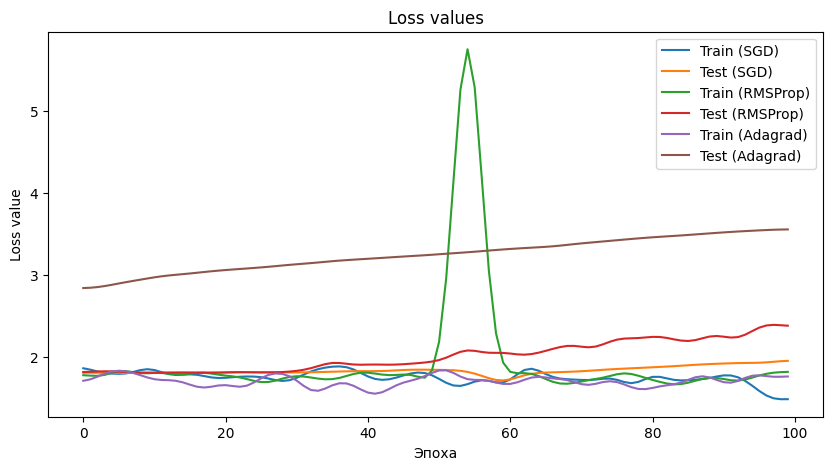

In [ ]:
import random
import numpy as np
import gc
from scipy.ndimage.filters import gaussian_filter1d
import deeplake
import torch

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

class LeNet5(torch.nn.Module):
    # конструктор. Определям вообще какие слои у нас будут
    def __init__(self):
        super(LeNet5, self).__init__()

        self.conv1 = torch.nn.Conv2d(
            in_channels=1, out_channels=6, kernel_size=5, padding=2)
        self.act1  = torch.nn.ReLU() #с релу быстрее обучается, и точность с гиперьболическим тангенсом не прывашала 0,45
        self.pool1 = torch.nn.AvgPool2d(kernel_size=2, stride=2)

        self.conv2 = torch.nn.Conv2d(
            in_channels=6, out_channels=16, kernel_size=5, padding=0)
        self.act2  = torch.nn.ReLU()
        self.pool2 = torch.nn.AvgPool2d(kernel_size=2, stride=2)

        self.fc1   = torch.nn.Linear(1600, 120)
        self.act3  = torch.nn.ReLU()

        self.fc2   = torch.nn.Linear(120, 84)
        self.act4  = torch.nn.ReLU()

        self.fc3   = torch.nn.Linear(84, 7)

    # наша самая главная функция. Определяем, что и в каком порядке будет вызываться
    def forward(self, x):

        x = self.conv1(x)
        x = self.act1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool2(x)

        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))

        x = self.fc1(x)
        x = self.act3(x)
        x = self.fc2(x)
        x = self.act4(x)
        x = self.fc3(x)

        return x

# переменная - наша нейронка
lenet5 = LeNet5()

def paint(train_loss_history, test_loss_history, name):
    train_loss_smoothed = gaussian_filter1d(train_loss_history, sigma=2)
    test_loss_smoothed = gaussian_filter1d(test_loss_history, sigma=2)
    plt.plot(train_loss_smoothed, label=f'Train ({name})')
    plt.plot(test_loss_smoothed, label=f'Test ({name})')

def learn(optimizer, X_test, y_test, X_train, y_train, lenet5, device):
    batch_size = 100
    test_accuracy_history = []
    test_loss_history = []
    train_loss_history = []

    # Добавляем списки для сохранения весов и потерь
    weights_history = []
    loss_history = []

    X_test = X_test.to(device)
    y_test = y_test.to(device)
    y_train = y_train.view(-1).long()
    y_test = y_test.view(-1).long()

    for epoch in range(100):
        order = np.random.permutation(len(X_train))
        for start_index in range(0, len(X_train), batch_size):
            optimizer.zero_grad()
            batch_indexes = order[start_index:start_index + batch_size]
            X_batch = X_train[batch_indexes].to(device)
            y_batch = y_train[batch_indexes].to(device)
            preds = lenet5.forward(X_batch)
            loss_value = loss(preds, y_batch)
            loss_value.backward()
            optimizer.step()

        train_loss_history.append(loss_value.data.cpu())

        test_preds = lenet5.forward(X_test)
        test_loss_history.append(loss(test_preds, y_test).data.cpu())
        accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
        test_accuracy_history.append(accuracy)

        print(f"epoch{epoch} - accuracy test {accuracy} ")

        # Сохраняем веса и потери на каждой эпохе
        weights_history.append([param.data.cpu().numpy() for param in lenet5.parameters()])
        loss_history.append(loss_value.data.cpu().numpy())

    return test_accuracy_history, test_loss_history, train_loss_history, weights_history, loss_history

gc.collect()
torch.cuda.empty_cache()

FER2013_train = deeplake.load('hub://activeloop/fer2013-train')
FER2013_test = deeplake.load('hub://activeloop/fer2013-public-test')

X_train = torch.tensor(FER2013_train.images.numpy())
y_train = torch.tensor(FER2013_train.labels.numpy())

X_test = torch.tensor(FER2013_test.images.numpy())
y_test = torch.tensor(FER2013_test.labels.numpy())

X_train = X_train.unsqueeze(1).float()
X_test = X_test.unsqueeze(1).float()
lenet5 = LeNet5()

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
lenet5 = lenet5.to(device)

# в качестве функции потерь будем использовать CrossEntropyLoss()
loss = torch.nn.CrossEntropyLoss()


optimizer = torch.optim.SGD(lenet5.parameters(), lr=0.01, momentum=0.9)
optimizer2 = torch.optim.RMSprop(lenet5.parameters(), lr=0.01, alpha=0.99)
optimizer3 = torch.optim.Adagrad(lenet5.parameters(), lr=0.01)

test_accuracy_history, test_loss_history, train_loss_history, weights_history, loss_history = learn(optimizer, X_test, y_test, X_train, y_train, lenet5, device )
test_accuracy_history2, test_loss_history2, train_loss_history2, weights_history2, loss_history2 = learn(optimizer2, X_test, y_test, X_train, y_train, lenet5, device)
test_accuracy_history3, test_loss_history3, train_loss_history3,weights_history3, loss_history3 = learn(optimizer3, X_test, y_test, X_train, y_train, lenet5, device)

fig = plt.figure(figsize=(10, 5))
plt.title('Loss values')
plt.xlabel('Эпоха')
plt.ylabel('Loss value')

paint(train_loss_history, test_loss_history, 'SGD')
paint(train_loss_history2, test_loss_history2, 'RMSProp')
paint(train_loss_history3, test_loss_history3, 'Adagrad')

plt.legend()
plt.show()




## Задание 3. Изучите статью https://habr.com/ru/companies/skillfactory/articles/536606/. Попробуйте воспроизвести ее результаты в своем коде. Если не получится сделать анимацию, можно те же графики оставить статическими.

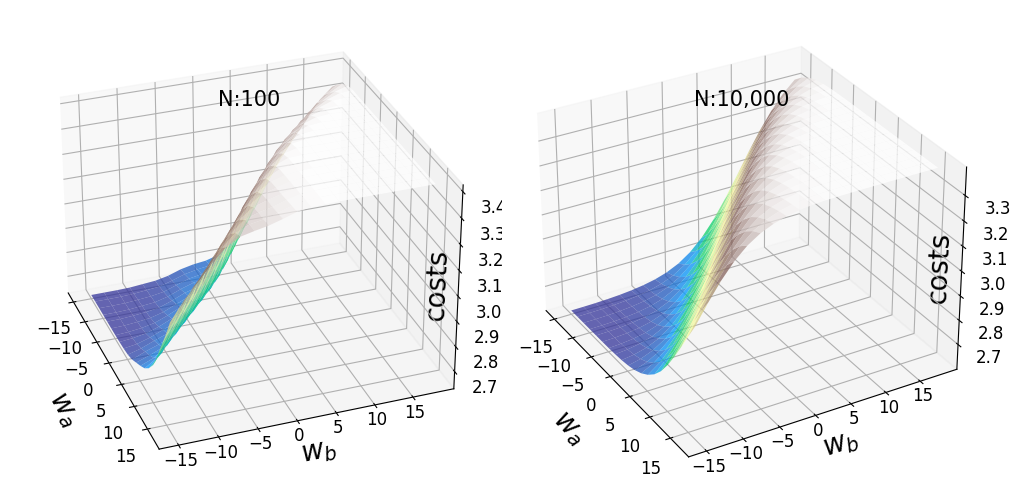

In [ ]:
from sklearn.preprocessing import OneHotEncoder
X_train_flat = X_train.reshape(X_train.shape[0], -1)

oh = OneHotEncoder(categories='auto')
y_train_oh = oh.fit_transform(y_train.reshape(-1, 1)).toarray()

hidden_0 = 50  # number of nodes of first hidden layer
hidden_1 = 500  # number of nodes of second hidden layer

# Set up cost function:
def costs(x, y, w_a, w_b, seed_):
    np.random.seed(seed_) # insert random seed
    w0 = torch.tensor(np.random.randn(hidden_0, 2304), dtype=torch.float32)  # weight matrix of 1st hidden layer
    w1 = torch.tensor(np.random.randn(hidden_1, hidden_0), dtype=torch.float32) # weight matrix of 2nd hidden layer
    w2 = torch.tensor(np.random.randn(7, hidden_1), dtype=torch.float32) # weight matrix of output layer
    w2[5][250] = torch.tensor(w_a, dtype=torch.float32) # set value for weight w_250,5(2)
    w2[5][251] = torch.tensor(w_b, dtype=torch.float32) # set value for weight w_251,5(2)
    a0 = torch.sigmoid(w0 @ x.T)  # output of 1st hidden layer
    a1 = torch.sigmoid(w1 @ a0)  # output of 2nd hidden layer
    pred = torch.sigmoid(w2 @ a1) # output of final layer
    return np.mean(np.sum((y - pred.numpy())**2, axis=0)) # costs w.r.t. w_a and w_b

m1s = np.linspace(-15, 17, 20)
m2s = np.linspace(-15, 18, 20)
M1, M2 = np.meshgrid(m1s, m2s)  # create meshgrid

# Determine costs for each coordinate in meshgrid:
zs_100 = np.array([costs(X_train_flat[0:100], y_train_oh[0:100].T,
                        np.array([[mp1]]), np.array([[mp2]]), 135)
                   for mp1, mp2 in zip(np.ravel(M1), np.ravel(M2))])
Z_100 = zs_100.reshape(M1.shape)  # z-values for N=100

zs_10000 = np.array([costs(X_train_flat[0:10000], y_train_oh[0:10000].T,
                          np.array([[mp1]]), np.array([[mp2]]), 135)
                     for mp1, mp2 in zip(np.ravel(M1), np.ravel(M2))])
Z_10000 = zs_10000.reshape(M1.shape)  # z-values for N=10,000

# Plot loss landscapes:
fig = plt.figure(figsize=(10, 7.5))  # create figure
ax0 = fig.add_subplot(121, projection='3d')
ax1 = fig.add_subplot(122, projection='3d')

fontsize_ = 20  # set axis label fontsize
labelsize_ = 12  # set tick label size

# Customize subplots:
ax0.view_init(elev=30, azim=-20)
ax0.set_xlabel(r'$w_a$', fontsize=fontsize_, labelpad=9)
ax0.set_ylabel(r'$w_b$', fontsize=fontsize_, labelpad=-5)
ax0.set_zlabel("costs", fontsize=fontsize_, labelpad=-30)
ax0.tick_params(axis='x', pad=5, which='major', labelsize=labelsize_)
ax0.tick_params(axis='y', pad=-5, which='major', labelsize=labelsize_)
ax0.tick_params(axis='z', pad=5, which='major', labelsize=labelsize_)
ax0.set_title('N:100', y=0.85, fontsize=15)  # set title of subplot

ax1.view_init(elev=30, azim=-30)
ax1.set_xlabel(r'$w_a$', fontsize=fontsize_, labelpad=9)
ax1.set_ylabel(r'$w_b$', fontsize=fontsize_, labelpad=-5)
ax1.set_zlabel("costs", fontsize=fontsize_, labelpad=-30)
ax1.tick_params(axis='y', pad=-5, which='major', labelsize=labelsize_)
ax1.tick_params(axis='x', pad=5, which='major', labelsize=labelsize_)
ax1.tick_params(axis='z', pad=5, which='major', labelsize=labelsize_)
ax1.set_title('N:10,000', y=0.85, fontsize=15)

# Surface plots of costs (= loss landscapes):
ax0.plot_surface(M1, M2, Z_100, cmap='terrain',  # surface plot
                 antialiased=True, cstride=1, rstride=1, alpha=0.75)
ax1.plot_surface(M1, M2, Z_10000, cmap='terrain',  # surface plot
                 antialiased=True, cstride=1, rstride=1, alpha=0.75)
plt.tight_layout()
plt.show()

In [190]:
from scipy.special import expit

# Store values of costs and weights in lists:
weights_2_5_250 = []
weights_2_5_251 = []
costs = []

seed_ = 135  # random seed
N = 100  # sample size

# Set up neural network:
class NeuralNetwork(object):
    def __init__(self, lr=0.01):
        self.lr = lr
        np.random.seed(seed_)  # set random seed
        # Initialize weight matrices:
        self.w0 = np.random.randn(hidden_0, 784)
        self.w1 = np.random.randn(hidden_1, hidden_0)
        self.w2 = np.random.randn(10, hidden_1)
        self.w2[5][48] = start_a  # set starting value for w_a
        self.w2[5][49] = start_b  # set starting value for w_b

    def train(self, X, y):
        if isinstance(X, torch.Tensor):
            X = X.numpy()
        if isinstance(y, torch.Tensor):
            y = y.numpy()
        print(self.w0.shape, X.T.shape)
        a0 = expit(self.w0 @ X.T)
        a1 = expit(self.w1 @ a0)
        pred = expit(self.w2 @ a1)
        # Partial derivatives of costs w.r.t. the weights of the output layer:
        dw2 = (pred - y.T) * pred * (1 - pred) @ a1.T / len(X)  # ... averaged over the sample size
        # Update weights:
        self.w2[5][250] = self.w2[5][250] - self.lr * dw2[5][250]
        self.w2[5][251] = self.w2[5][251] - self.lr * dw2[5][251]
        costs.append(self.cost(pred, y))  # append cost values to list

    def cost(self, pred, y):
        return np.mean(np.sum((y.T - pred) ** 2, axis=0))

# Initial values of w_a/w_b:
starting_points = [(-9, 15), (-10.1, 15), (-11, 15)]
X_train_flat = X_train_flat.reshape(-1, 784).astype(np.float32) / 255.0
for j in starting_points:
    start_a, start_b = j
    model = NeuralNetwork(10)  # set learning rate to 10
    for i in range(10000):  # 10,000 epochs
        model.train(X_train_flat[0:N], y_train_oh[0:N])
        weights_2_5_250.append(model.w2[5][250])  # append weight values to list
        weights_2_5_251.append(model.w2[5][251])  # append weight values to list

# Create sublists of costs and weight values for each starting point:
costs = np.split(np.array(costs), 3)
weights_2_5_250 = np.split(np.array(weights_2_5_250), 3)
weights_2_5_251 = np.split(np.array(weights_2_5_251), 3)

RuntimeError: shape '[-1, 784]' is invalid for input of size 66145536